In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
# Set paths
data_dir = "C:\\Users\\USER\\Desktop\\minor project\\Dataset\\no_defect"

# Load the pre-trained VGG16 model for feature extraction
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [3]:
# Function to load images from a folder and preprocess them
def load_and_preprocess_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Resize to fit the model input
            images.append(img)
    return np.array(images)

# Load and preprocess the dataset
images = load_and_preprocess_images(data_dir)

# Extract features using the pre-trained model
def extract_features(images):
    features = model.predict(images)
    return features.reshape(features.shape[0], -1)  # Flatten the features

# Extract features for the dataset images
features = extract_features(images)


17/17 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step


In [4]:
def process_input_image(input_image_path):
    # Load and preprocess the input image
    input_img = cv2.imread(input_image_path)
    input_img_resized = cv2.resize(input_img, (224, 224))
    input_img_array = np.array(input_img_resized).reshape(-1, 224, 224, 3)

    # Extract features for the input image
    input_features = extract_features(input_img_array)

    # Compare input features with dataset features
    differences = []
    for feature in features:
        diff = mean_squared_error(input_features.flatten(), feature)
        differences.append(diff)

    # Find the best match (smallest difference)
    threshold = 0.1  # Adjust this threshold based on your needs
    best_match_index = np.argmin(differences)
    best_match_difference = differences[best_match_index]

    # Check if the difference exceeds the threshold
    if best_match_difference > threshold:
        return input_img, "Defective", (0, 0, 255)  # Red
    else:
        return input_img, "Non-defective", (0, 255, 0)  # Green


In [5]:
def analyze_and_display(input_img, result_text, result_color):
    # Show the result
    cv2.putText(input_img, result_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, result_color, 2)

    # Display the input image with the result
    plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # After determining that the input image is "Defective"
    if result_text == "Defective":
        # Convert the input image to grayscale
        gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

        # Thresholding to create a binary image
        _, thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)

        # Finding contours
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw contours on the original image
        for contour in contours:
            if cv2.contourArea(contour) > 100:  # Filter small contours
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(input_img, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Draw rectangle in red

        # Show the result with marked defect regions
        cv2.putText(input_img, result_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        plt.imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


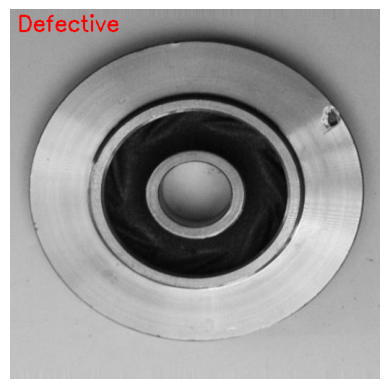

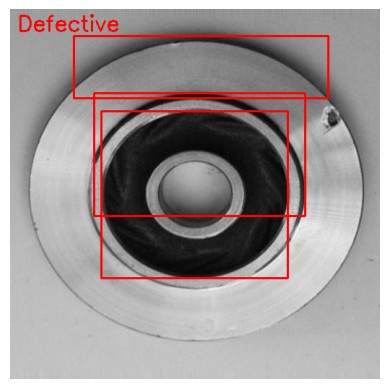

In [7]:
# Input image path
input_image_path = "C:\\Users\\USER\\Desktop\\minor project\\Dataset\\defect\\cast_def_0_93.jpeg"  # Change this to your input image path

# Process input image and display results
input_img, result_text, result_color = process_input_image(input_image_path)
analyze_and_display(input_img, result_text, result_color)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


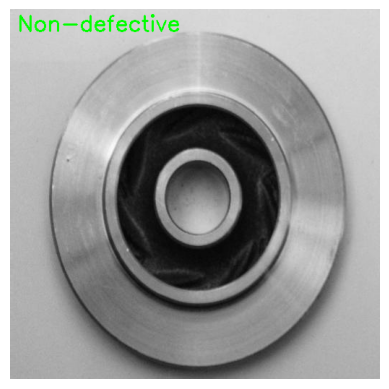

In [8]:
# Input image path
input_image_path = "C:\\Users\\USER\\Desktop\\minor project\\Dataset\\no_defect\\cast_ok_0_35.jpeg"  # Change this to your input image path

# Process input image and display results
input_img, result_text, result_color = process_input_image(input_image_path)
analyze_and_display(input_img, result_text, result_color)
